### **Стохастический Градиентный и Координатный Спуски**

##### **Загрузка и Подготовка Данных**

Импортируем необходимые библиотеки:

In [1]:
#import libraries
import pandas as pd, numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame

In [2]:
data = pd.read_csv('data/Advertising.csv', index_col=[0])
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Проверьте, есть ли в данных пропуски и, если они есть - удалите их:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
#check for null values
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [5]:
#basic statistical information
data.describe().round(2)

,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


In [6]:
#check for duplicates
dupl_columns = list(data.columns)

mask = data.duplicated(subset=dupl_columns)
unconv_duplicates = data[mask]
print(f'Number of Duplicates: {unconv_duplicates.shape[0]}')

Number of Duplicates: 0


Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y (целевая переменная)

In [7]:
#select the features
X = data.iloc[:, :3].values
y = data['sales'].values

In [8]:
#check the dimensions
print(X.shape, y.shape)

(200, 3) (200,)


#### **Координатный Спуск**

Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:

In [9]:
#add the vector of one
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)

#confirm the new dimensions
print(X.shape, y.shape)

(200, 4) (200, 1)


Нормализуем данные: обычно это необходимо для корректной работы алгоритма

In [10]:
#normalize the features
X = X / np.sqrt(np.sum(np.square(X),
                       axis=0))

**Реализуйте алгоритм координатного спуска:**

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [11]:
#set number of rows
m = X.shape[0]

#set number of columns
n = X.shape[1]

#set the zeroed vector of coefficients
w = np.zeros(n).reshape(-1, 1)

In [12]:
#write a function to calculate the coordinate descent
def coordinate_descent(X, y, w, num_iters=100):
    #create the arrays to store results
    mse_v, mae_v = np.array([]), np.array([])
    
    #initiate the loop
    for i in range(num_iters):
        for k in range(n):
            #calculate the prediction without the k-th factor
            h = (X[:, 0:k] @ w[0:k]) + (X[:, k + 1:] @ w[k + 1:])
            
            #update the new value of the k-th coefficient
            w[k] = (X[:, k].T @ (y - h))
            
            #calculate the loss functions:
            #calculate Mean Squared Error
            mse = np.append(mse_v, np.sum((y - (X @ w))**2) / (len(y)))
            
            #calculate Mean Absolute Error
            mae = np.append(mae_v, np.sum(abs(y - (X @ w))) / (len(y)))
    
    return w, mse[-1], mae[-1]

In [13]:
#calculate the coordinate descent
crd_dsc_v, mse_crd_dsc, mae_crd_dsc = coordinate_descent(X, y, w)

In [14]:
#find the coordinate descent coefficients
print(crd_dsc_v.T)
print(np.round(crd_dsc_v.T, 2))

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]
[[ 41.56 110.13  73.53  -0.55]]


In [15]:
#find the results of the loss functions
print(f'MSE: {mse_crd_dsc:.3f}')
print(f'MAE: {mae_crd_dsc:.3f}')

MSE: 2.784
MAE: 1.252


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [16]:
#create an object class
lin_reg = linear_model.LinearRegression(fit_intercept=False)

#model learning
lin_reg.fit(X, y)

y_pred = lin_reg.predict(X)

#find the coefficients
print(lin_reg.coef_)
print(np.round(lin_reg.coef_, 2))

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]
[[ 41.56 110.13  73.53  -0.55]]


In [17]:
print(f'MSE: {metrics.mean_squared_error(y, y_pred):.3f}')
print(f'MAE: {metrics.mean_absolute_error(y, y_pred):.3f}')

MSE: 2.784
MAE: 1.252


**Вывод**:

Нет разницы между коэффициентами, созданными вручную путём формул и автоматической моделью с помошью *scikit-learn*, соответственно и метрики неразличимы.

Можно утверждать, что алгоритм из внутренних библиотек построен на тех же формулах.

#### **Стохастический Градиентный Спуск**

Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение

In [18]:
#select the features
X = data.iloc[:, :3].values
y = data['sales'].values

In [19]:
#standardize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

Добавим единичный столбец

In [20]:
#add the vector of one
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)

print(X.shape, y.shape)

(200, 4) (200, 1)


Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse

In [21]:
#write a function to calculate the Mean Squared Error
def mse_error(y, y_pred):
    #calculate Mean Squared Error
    return np.sum((y - y_pred)**2) / len(y)

Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза

In [22]:
#make a naive prediction
y_pred_naive = np.full(y.shape, y.mean())

print(f'MSE: {mse_error(y, y_pred_naive):.3f}')

MSE: 27.086


In [23]:
#check the result against an in-build library
print(f'MSE: {metrics.mean_squared_error(y, y_pred_naive):.3f}')

MSE: 27.086


**Вывод**:

Нет разницы между метриками, можно утверждать, что алгоритм из внутренних библиотек построен на тех же формулах.
Наивный прогноз показывает результаты значительно хуже: 27.086 > 2.784.

Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов

In [24]:
#write a function to produce the vector of predictions
def lin_pred(X, w):
    #reshape to 1D
    w = w.reshape(-1, 1)
    
    #calculate the vector of predictions
    return (X@w).reshape(-1, 1)

Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска.

Функция должна принимать на вход следующие аргументы:

* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [25]:
#write a function to calculate the steps in stochastic gradient descent
def stoch_grad_step(X, y, w, train_ind, eta):
    #calculate the difference between the predicted and actual value
    difference = lin_pred(X[train_ind], w) - y[train_ind]
    
    #calculate the direction of change in the weights
    direction = X[train_ind, :] * 2 * difference / len(y)
    
    #update the weights
    return w - direction * eta

Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [26]:
#write a function to calculate the stochastic gradient descent
def stochastic_gradient_descent(X, y, starting_w, eta=0.08, max_iter=1000, min_distance=0.000001):
    #set the distance
    distance = np.inf
    
    #create an array to store results
    mse_v = np.array([])
    
    #set the iteration value
    iter_no = 0
    
    #set the initial value of the vector of weights
    w = starting_w
    
    while distance > min_distance and iter_no < max_iter:
        #set a random index
        random_index = np.random.randint(len(y))

        #initialize the next step in the descent
        w_new = stoch_grad_step(X, y, w, random_index, eta)

        #calculate the current distance between points
        distance = np.linalg.norm(w - w_new)

        #calculate Mean Squared Error
        mse_v = np.append(mse_v, mse_error(y, lin_pred(X, w)))

        #update the vector of weights and the current iteration value
        w = w_new
        iter_no += 1

    return w, mse_v

Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.

In [27]:
#set the vector
w = np.zeros(4)

#calculate the stochastic gradient descent
stoch_grad_desc_v, mse_stoch_grad_desc = stochastic_gradient_descent(X, y, w, max_iter=(10**5))

In [28]:
#find the number of iterations
print(f'Number of Iterations: {len(mse_stoch_grad_desc)}')
mse_stoch_grad_desc

Number of Iterations: 8116


array([223.71625   , 222.59650861, 222.54703417, ...,   2.78799793,
         2.78782154,   2.78783503])

Постройте график зависимости ошибки от номера итерации

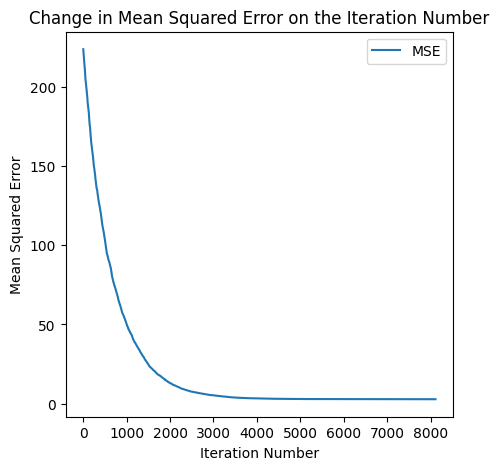

In [29]:
plt.figure(figsize=(5, 5))

plt.plot(mse_stoch_grad_desc,
         label='MSE')

plt.legend()

plt.title('Change in Mean Squared Error on the Iteration Number')
plt.ylabel('Mean Squared Error')
plt.xlabel('Iteration Number');

Выведите вектор весов, к которому сошелся метод.

In [30]:
stoch_grad_desc_v

array([[13.98877605,  3.89939367,  2.76613624,  0.02719604]])

Выведите среднеквадратичную ошибку на последней итерации.

In [31]:
print(f'MSE: {mse_stoch_grad_desc[-1]:.3f}')
print(f'MSE: {mse_stoch_grad_desc[-1]}')

MSE: 2.788
MSE: 2.7878350335553925


In [32]:
#confirm the results against in-build library
print(f'MSE: {metrics.mean_squared_error(y, lin_pred(X, stoch_grad_desc_v)):.3f}')
print(f'MSE: {metrics.mean_squared_error(y, lin_pred(X, stoch_grad_desc_v))}')
print()
print(f'MAE: {metrics.mean_absolute_error(y, lin_pred(X, stoch_grad_desc_v)):.3f}')

MSE: 2.788
MSE: 2.7878350986164184

MAE: 1.263


**Вывод**:

Метрики практически неразличимы, алгоритм из внутренних библиотек построен на тех же формулах, но на разных векторах веса.